<div style="text-align: center; padding: 20px; background-color: #000000; border-radius: 10px; margin: 20px 0;">
    <h1 style="color: #008080 	;">Data Insights Discovery: Leveraging Exploratory Data Analysis (EDA)<h1>
    <hr style="border: 2px solid #008080;">
</div>

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from forex_python.converter import CurrencyRates

In [37]:
EDA_DATA_FILE = 'task2.csv'

<style>
h2 {
        /* green code */
        color: #3EB489;
}
</style>

<!-- header -->
## Pre-Analyzing the Data
In this section, we will delete the columns that are not necessary for the analysis. We will also check for missing values and duplicates.

First, we load the dataset and take a look at it:

In [2]:
salaries_df = pd.read_csv(EDA_DATA_FILE)

salaries_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [3]:
print('Rows before removing duplicates:', len(salaries_df))

print("Number of duplicated rows:", salaries_df.duplicated().sum())
salaries_df = salaries_df.drop_duplicates()

print('Rows after removing duplicates:', len(salaries_df))

Rows before removing duplicates: 13972
Number of duplicated rows: 5565
Rows after removing duplicates: 8407


The `describe()` method is applied to get a statistical summary of the data:

In [4]:
display(salaries_df.describe().style.background_gradient(cmap='viridis'))

,Work_Year,Salary,Remote_Ratio
count,8407.000000,8407.000000,8407.000000
mean,2023.090401,173606.575473,37.153563
std,0.777486,469265.235844,47.583260
min,2020.000000,14000.000000,0.000000
25%,2023.000000,96000.000000,0.000000
50%,2023.000000,140000.000000,0.000000
75%,2024.000000,188500.000000,100.000000
max,2024.000000,30400000.000000,100.000000


In [5]:
missing_data_per_column = salaries_df.isnull().sum()

print(missing_data_per_column)

Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64


Now let's see how many unique values are present in each column:

In [18]:
unique_values = {col: salaries_df[col].unique() for col in salaries_df.columns}

print('Number of unique values in each column:')
display(salaries_df.nunique().to_frame().style.background_gradient(cmap='viridis'))

Number of unique values in each column:


,0
Work_Year,5
Experience_Level,4
Employment_Type,4
Job_Title,146
Salary,2237
Salary_Currency,23
Remote_Ratio,3
Company_Size,3


Let's explore the first 10 unique values in each column. These values are shown based on the frequency of their occurrence:

In [20]:
print('Unique values in each column:')

for column, values in unique_values.items():
#     # print(f"{column}:\n {values}\n")
    display(salaries_df[column].value_counts().sort_values(ascending=False).head(10).to_frame().style.background_gradient(cmap='viridis'))


Unique values in each column:


,count
Work_Year,
2023,4505
2024,2514
2022,1097
2021,216
2020,75


,count
Experience_Level,
Senior-Level,5019
Mid-Level,2258
Entry-Level,806
Executive-Level,324


,count
Employment_Type,
Full-Time,8347
Contract,26
Part-Time,22
Freelance,12


,count
Job_Title,
Data Engineer,1589
Data Scientist,1563
Data Analyst,1144
Machine Learning Engineer,800
Analytics Engineer,315
Research Scientist,265
Data Architect,224
Research Engineer,178
Data Science,140


,count
Salary,
100000,143
150000,131
120000,118
80000,99
130000,95
90000,94
200000,93
70000,92
160000,92


,count
Salary_Currency,
USD,7499
GBP,410
EUR,339
INR,52
CAD,48
AUD,12
PLN,7
CHF,6
SGD,6


,count
Remote_Ratio,
0,5164
100,3004
50,239


,count
Company_Size,
Medium,7618
Large,612
S,177


<style>
h2 {
        /* green code */
        color: #3EB489;
}
</style>

## Currency Standardization
In this section, we will standardize the currency column to USD. We will also convert the data type of the `price` column to float.

We use online currency conversion APIs to convert the price to USD. The library `forex-python` is used to convert the currency to USD.

In [26]:
print('Currencies present in dataset with their counts:')
# print(salaries_df['Salary_Currency'].unique())
display(salaries_df['Salary_Currency'].value_counts().to_frame().T.style.background_gradient(cmap='viridis'))

Currencies present in dataset with their counts:


Salary_Currency,USD,GBP,EUR,INR,CAD,AUD,PLN,CHF,SGD,JPY,BRL,DKK,HUF,TRY,NOK,THB,ZAR,HKD,ILS,PHP,NZD,MXN,CLP
count,7499,410,339,52,48,12,7,6,6,4,4,3,3,3,2,2,1,1,1,1,1,1,1


In [27]:
# unique_values_freq = salaries_df['Salary_Currency'].value_counts()
# print(unique_values_freq)

We'll exclude rows where the count of 'Salary_currency' is less than 10.

In [33]:
salaries_df = salaries_df.groupby('Salary_Currency').filter(lambda x: len(x) >= 10)

display(salaries_df)

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [35]:
display(salaries_df['Salary_Currency'].value_counts().to_frame().T.style.background_gradient(cmap='viridis'))

Salary_Currency,USD,GBP,EUR,INR,CAD,AUD
count,7499,410,339,52,48,12


In [36]:
unique_currencies = salaries_df['Salary_Currency'].unique()

print(unique_currencies)

['USD' 'EUR' 'GBP' 'CAD' 'AUD' 'INR']


In [38]:
conversion_rates = {}

for currency in unique_currencies:
    try:
        conversion_rates[currency] = CurrencyRates().get_rate(currency, 'USD')
    except Exception as e:
        print(f"Error getting conversion rate for {currency}: {e}")

In [39]:
def apply_conversion(row):
    rate = conversion_rates.get(row['Salary_Currency'])
    if rate:
        return row['Salary'] * rate
    else:
        print('Error applying conversion rate for', row['Salary_Currency'])
        return None

We add the 'Salary_USD' column to the dataframe.

In [40]:
salaries_df['Salary_USD'] = salaries_df.apply(apply_conversion, axis=1)

In [41]:
display(salaries_df)

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_USD
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large,90000.000000
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium,180500.000000
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium,96200.000000
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium,235000.000000
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium,175000.000000
...,...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large,412000.000000
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large,151000.000000
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S,105000.000000
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large,100000.000000


<style>
h2 {
        /* green code */
        color: #3EB489;
}
</style>

## Employ Exploratory Data Analysis (EDA) Techniques
In this section, we will explore the data using various EDA techniques. We will analyze the data to gain insights and identify patterns.

<style>
    h3 {
        /* purple code */
        color: #800080;
    }
</style>

### Most Popular Job Titles

In [44]:
top_10_job_titles = salaries_df['Job_Title'].value_counts().head(10)

print('Top 10 Most Popular Job Titles:')
display(top_10_job_titles.to_frame().style.background_gradient(cmap='viridis'))

Top 10 Most Popular Job Titles:



,count
Job_Title,
Data Engineer,1584
Data Scientist,1548
Data Analyst,1141
Machine Learning Engineer,797
Analytics Engineer,315
Research Scientist,265
Data Architect,224
Research Engineer,177
Data Science,140


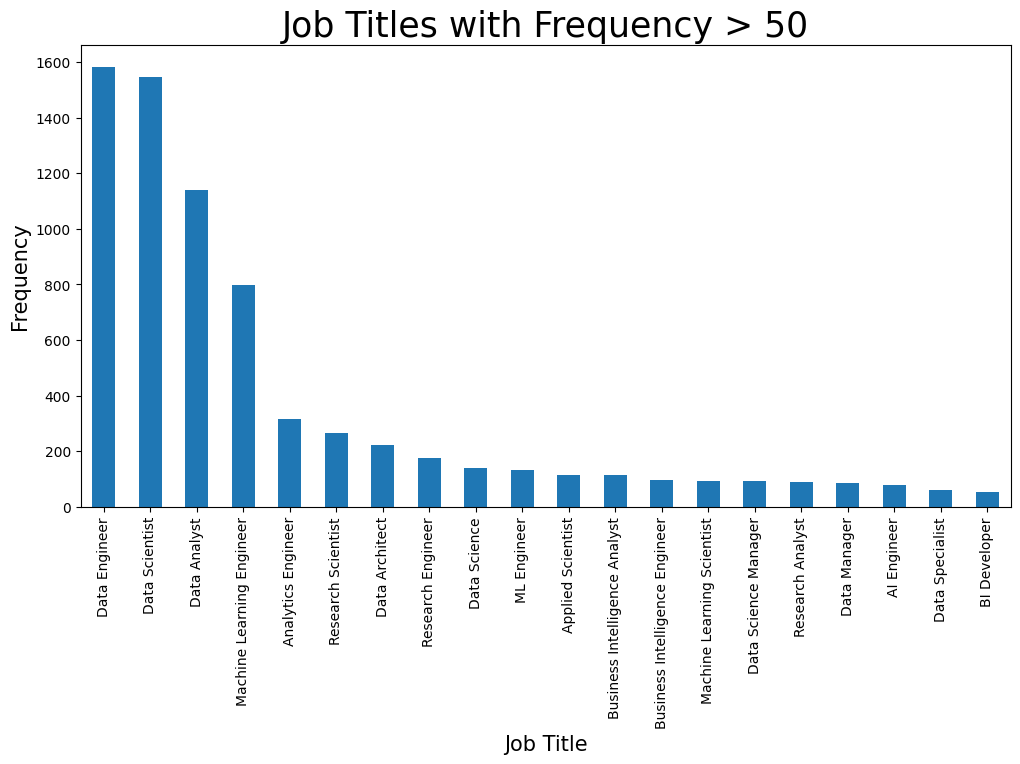

In [65]:
# plot all job titles sort based on frequency more than 50
job_title_freq = salaries_df['Job_Title'].value_counts()
job_title_freq_filtered = job_title_freq[job_title_freq > 50]

job_title_freq_filtered.plot(kind='bar', figsize=(12, 6))
plt.title('Job Titles with Frequency > 50', fontsize=25)
plt.xlabel('Job Title', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

<style>
    h3 {
        /* purple code */
        color: #800080;
    }
</style>

### Highest Paying Job Titles

Top 10 Job Titles with Highest Average Salaries:


,Salary_USD
Job_Title,
Analytics Engineering Manager,408807.896735
Data Science Tech Lead,375000.000000
Head of Machine Learning,299183.344908
Managing Director Data Science,280000.000000
AWS Data Architect,258000.000000
Cloud Data Architect,250000.000000
AI Architect,248945.000000
Prompt Engineer,213696.984615
Director of Data Science,212703.334047


<Axes: xlabel='Job_Title'>

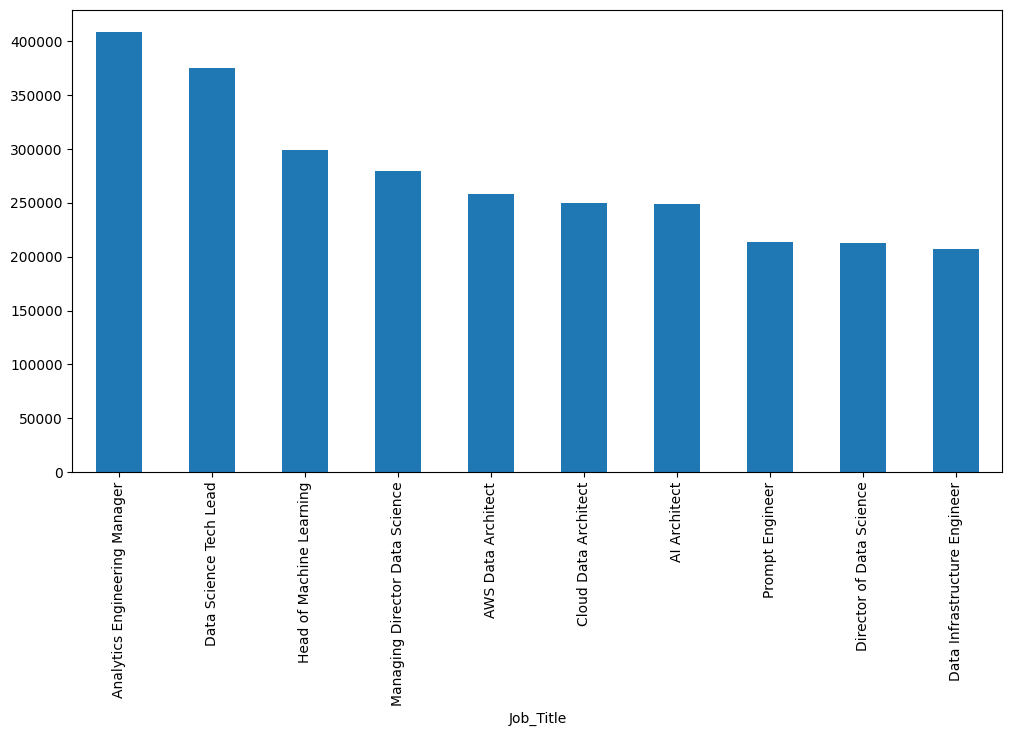

In [73]:
highest_salaries = salaries_df.groupby('Job_Title')['Salary_USD'].mean().sort_values(ascending=False)

top_10_highest_salaries = highest_salaries.head(10)

print('Top 10 Job Titles with Highest Average Salaries:')
display(top_10_highest_salaries.to_frame().style.background_gradient(cmap='viridis'))

top_10_highest_salaries.plot(kind='bar', figsize=(12, 6))

plot for salaries (box plot looks good)

<style>
    h3 {
        /* pink code */
        color: #FF1493;
        /* bold */
        font-weight: bold;
    }
</style>

### Correlation between different factors

<style>
    h4 {
        /* cyan code */
        color: #00FFFF;
    }
</style>

#### Correlation between Popular Job Titles and Salaries

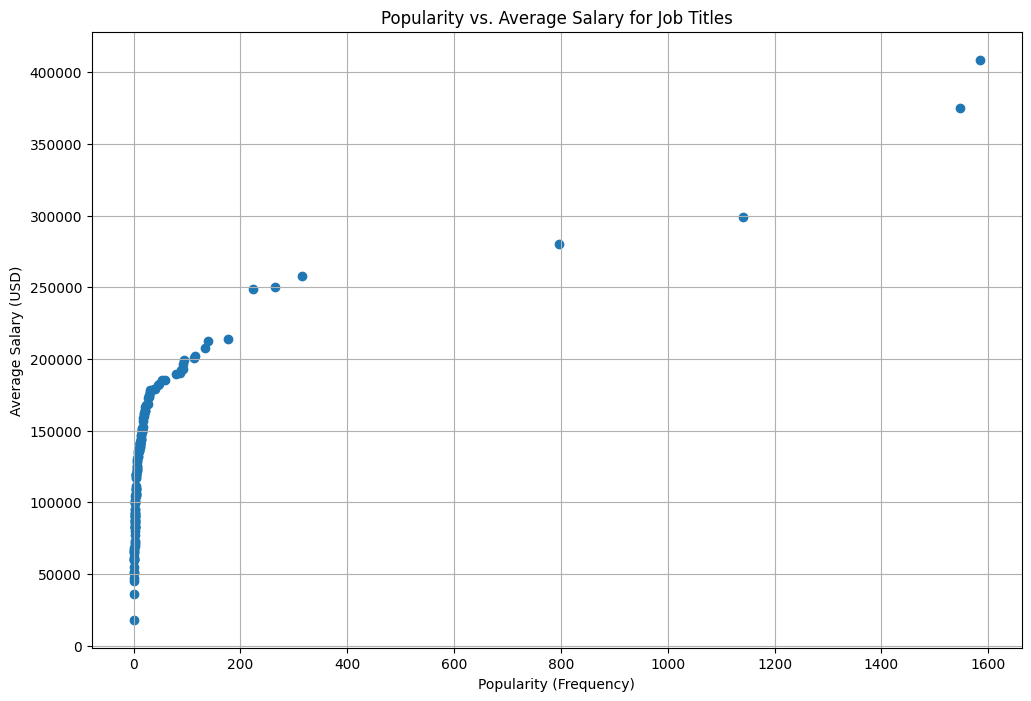

In [80]:
plt.figure(figsize=(12, 8))
plt.scatter(job_title_freq, highest_salaries)
plt.xlabel('Popularity (Frequency)')
plt.ylabel('Average Salary (USD)')
plt.title('Popularity vs. Average Salary for Job Titles')
plt.grid(True)
plt.show()

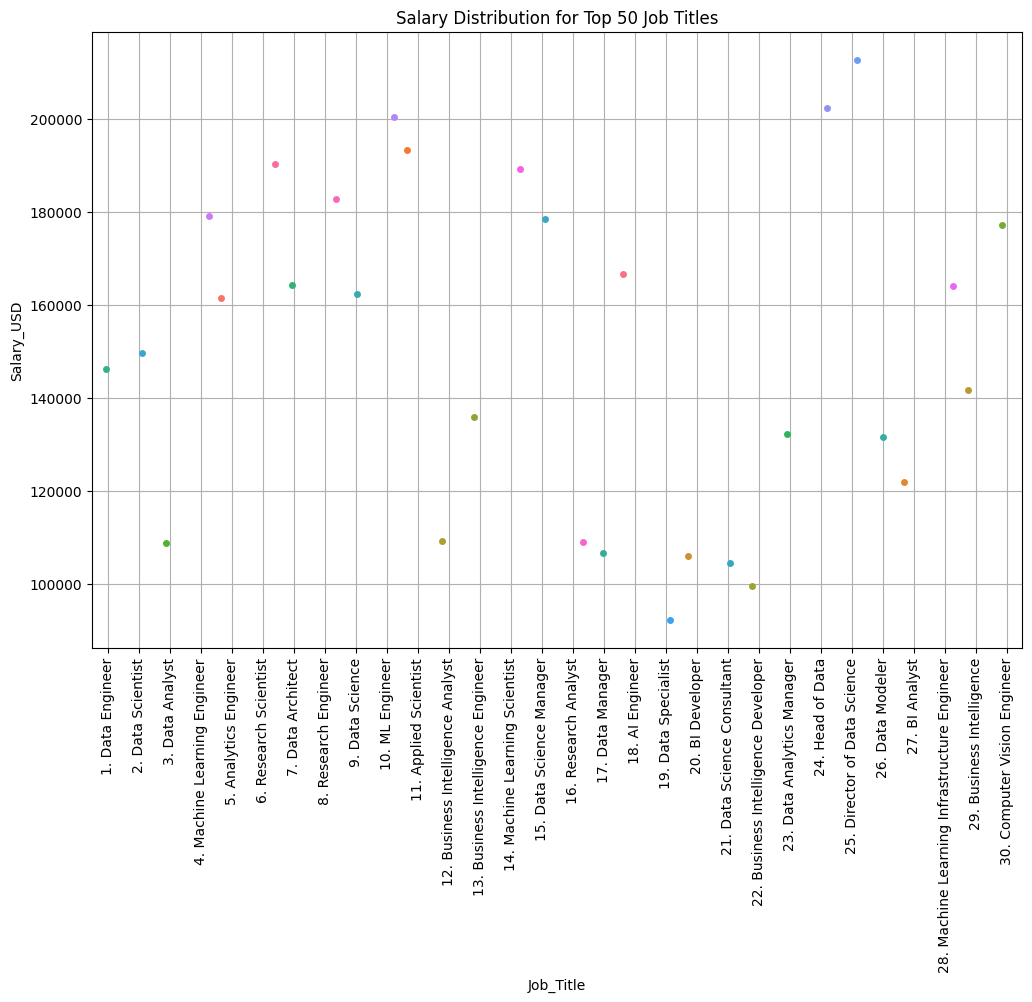

In [118]:
# scatter plot for salary distribution mean based on popularity only for top 30 job titles
top_30_job_titles = job_title_freq.head(30).index
top_30_job_titles_data = salaries_df[salaries_df['Job_Title'].isin(top_30_job_titles)]
top_30_job_titles_data = top_30_job_titles_data.groupby('Job_Title')['Salary_USD'].mean().reset_index()

plt.figure(figsize=(12, 8))
# x order based on popularity only for top 30 job titles
sns.stripplot(x='Job_Title', y='Salary_USD', data=top_30_job_titles_data, order=top_30_job_titles, hue='Job_Title', dodge=True)
plt.xticks(rotation=90)
plt.xticks(range(len(top_30_job_titles)), [f'{i+1}. {title}' for i, title in enumerate(top_30_job_titles)])
plt.title('Salary Distribution for Top 50 Job Titles')
plt.grid(True)
plt.show()

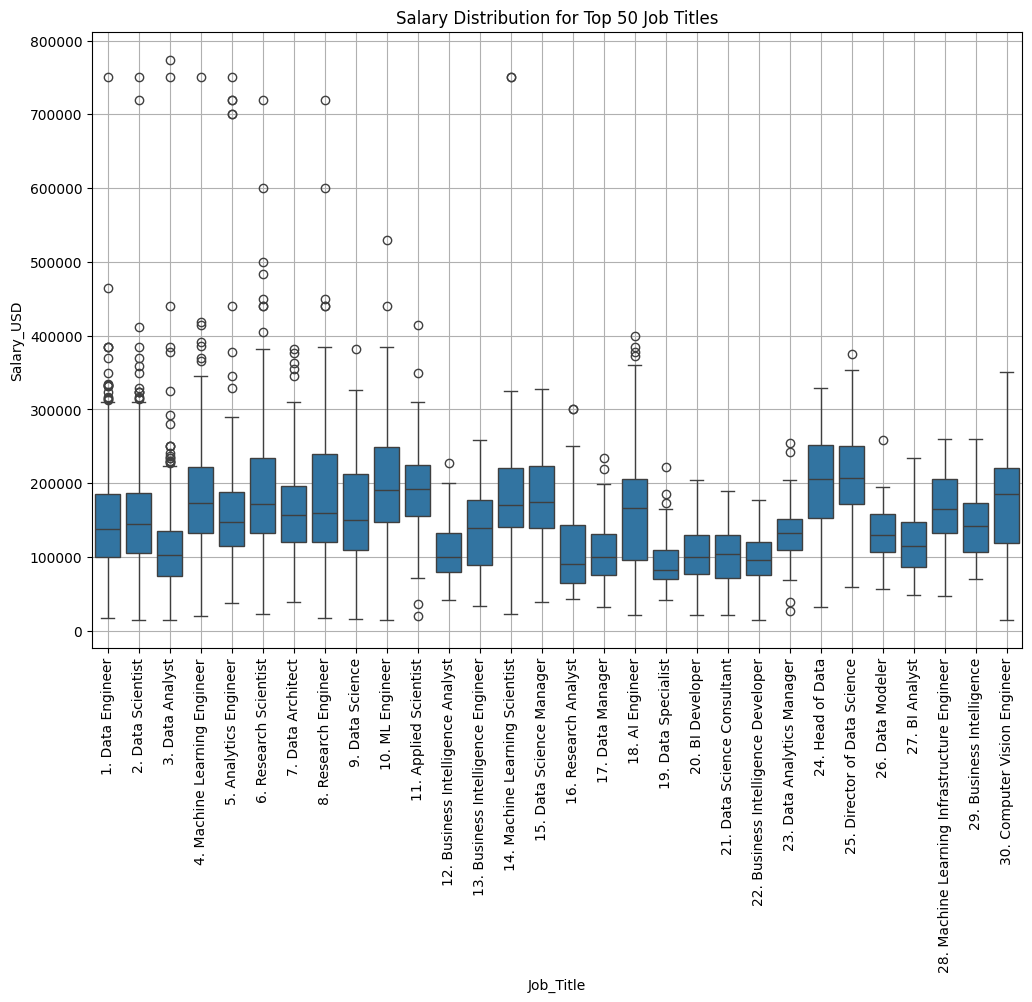

In [119]:
# box plot for salary distribution based on popularity only for top 30 job titles
top_30_job_titles_data = salaries_df[salaries_df['Job_Title'].isin(top_30_job_titles)]
plt.figure(figsize=(12, 8))
# number the job titles based on popularity. show number in front of job titles
sns.boxplot(x='Job_Title', y='Salary_USD', data=top_30_job_titles_data, order=top_30_job_titles)
plt.xticks(rotation=90)
plt.xticks(range(len(top_30_job_titles)), [f'{i+1}. {title}' for i, title in enumerate(top_30_job_titles)])
plt.title('Salary Distribution for Top 50 Job Titles') 
plt.grid(True)
plt.show()



<style>
    h4 {
        /* cyan code */
        color: #00FFFF;
    }
</style>

#### Correlation between Experience Level and Salaries

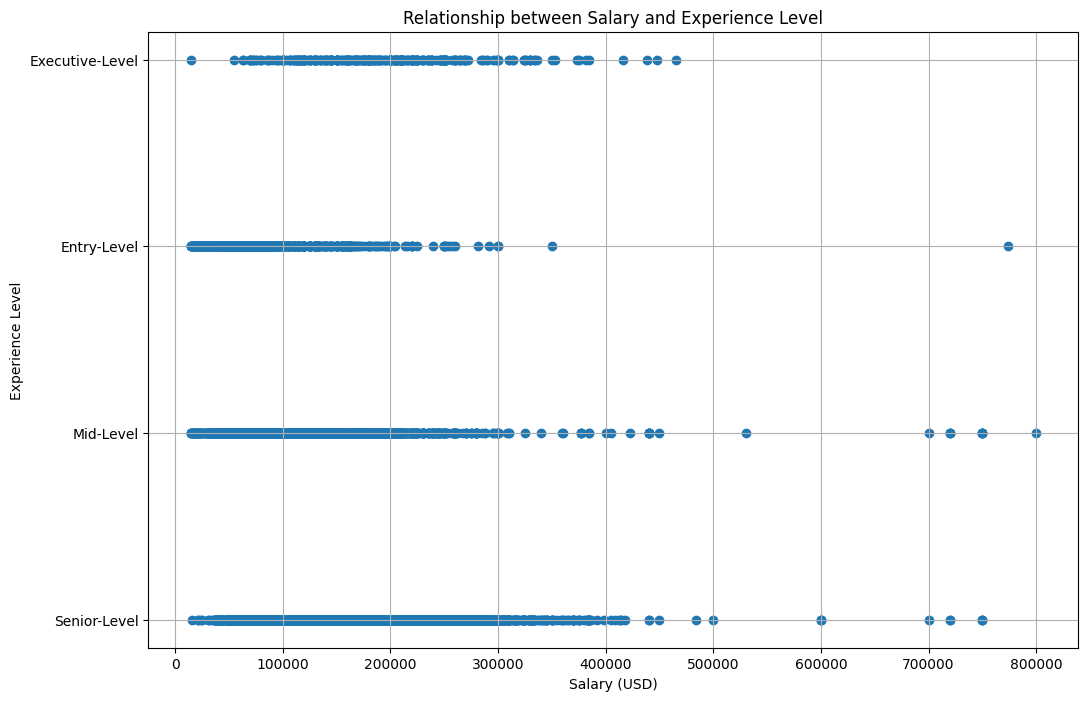

In [122]:
plt.figure(figsize=(12, 8))
plt.scatter(salaries_df['Salary_USD'], salaries_df['Experience_Level'])
plt.xlabel('Salary (USD)')
plt.ylabel('Experience Level')
plt.title('Relationship between Salary and Experience Level')
plt.grid(True)
plt.show()

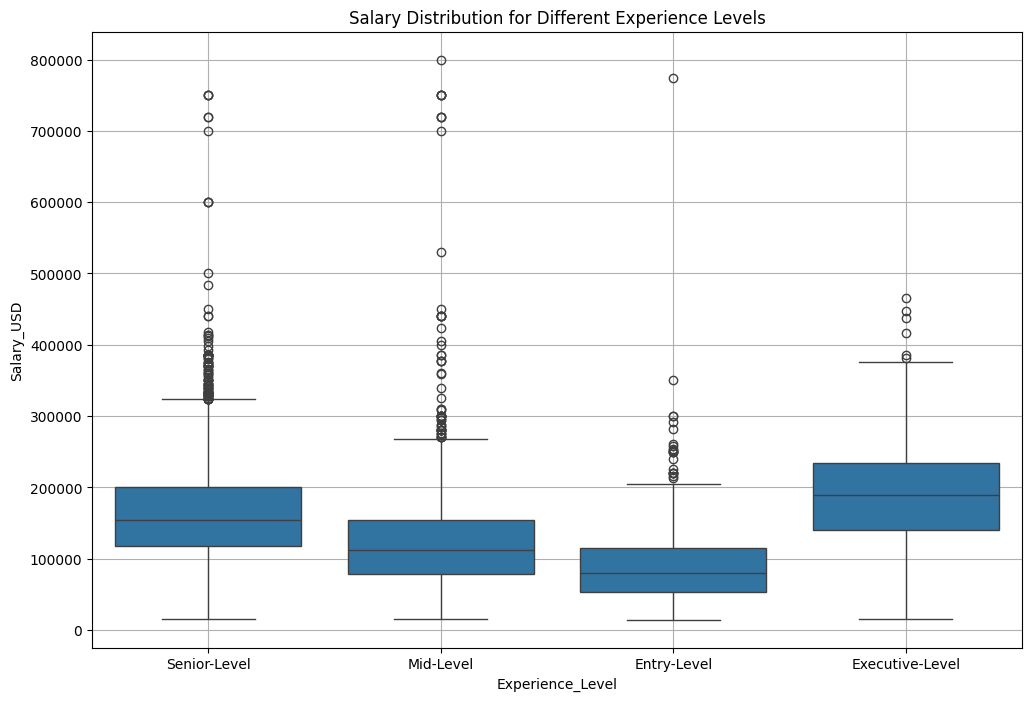

In [120]:
# box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Experience_Level', y='Salary_USD', data=salaries_df)
plt.title('Salary Distribution for Different Experience Levels')
plt.grid(True)
plt.show()



<style>
    h4 {
        /* cyan code */
        color: #00FFFF;
    }
</style>

#### Correlation between Work Years Titles and Salaries

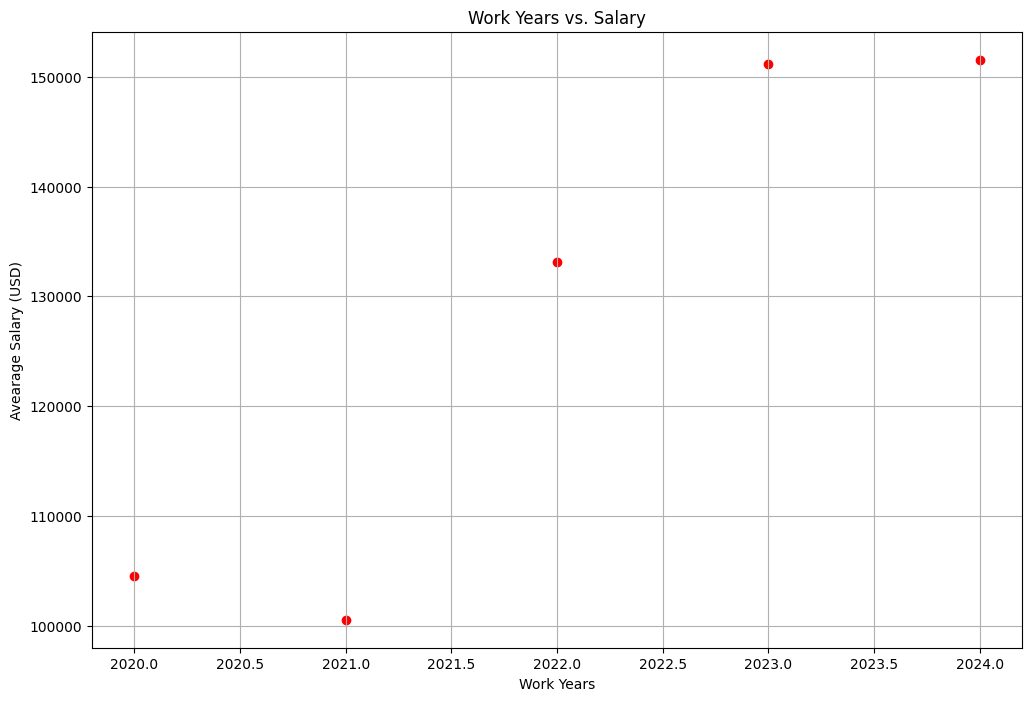

In [135]:
# plot between work years and Salaries scatter plot using mean
work_years_salary = salaries_df.groupby('Work_Year')['Salary_USD'].mean().reset_index()
plt.figure(figsize=(12, 8))
# sns.scatterplot(x='Work_Year', y='Salary_USD', data=salaries_df)
plt.scatter(work_years_salary['Work_Year'], work_years_salary['Salary_USD'], color='red')
plt.xlabel('Work Years')
plt.ylabel('Avearage Salary (USD)')
plt.title('Work Years vs. Salary')
plt.grid(True)
plt.show()


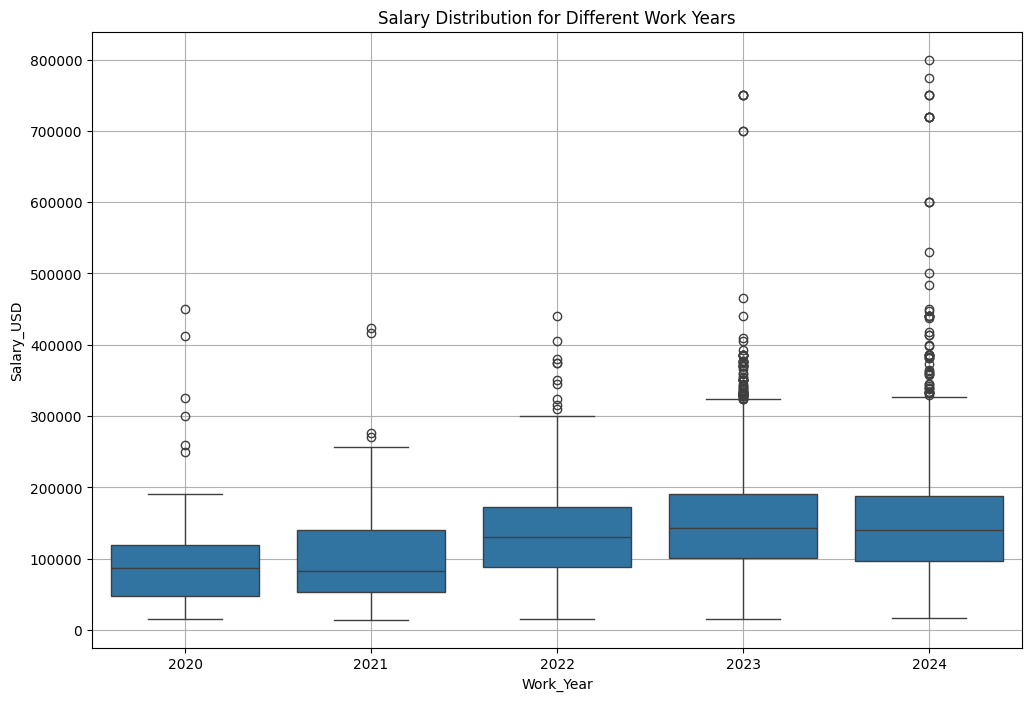

In [127]:
# box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Work_Year', y='Salary_USD', data=salaries_df)
plt.title('Salary Distribution for Different Work Years')
plt.grid(True)
plt.show()

<style>
    h4 {
        /* cyan code */
        color: #00FFFF;
    }
</style>

#### Correlation between Popular Job Titles and Salaries and Work Experience

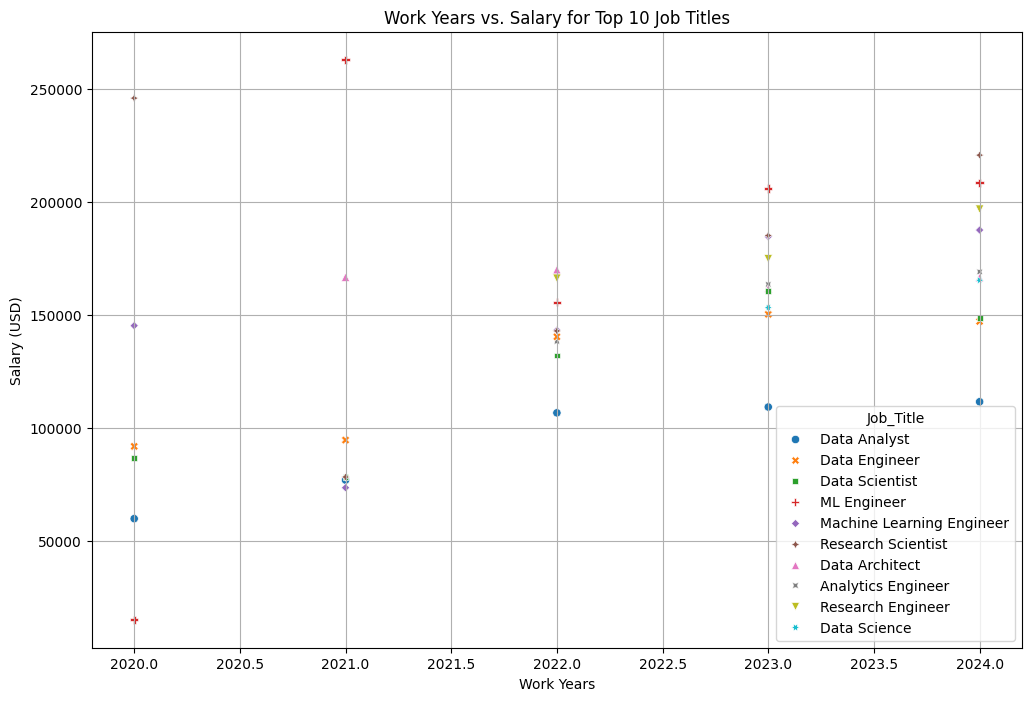

In [136]:
# plot between work experience and job titles and salaries
work_experience_salary = salaries_df.groupby(['Work_Year', 'Job_Title'])['Salary_USD'].mean().reset_index()
work_experience_salary = work_experience_salary[work_experience_salary['Job_Title'].isin(top_10_job_titles.index)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Work_Year', y='Salary_USD', data=work_experience_salary, hue='Job_Title', style='Job_Title')
plt.xlabel('Work Years')
plt.ylabel('Salary (USD)')
plt.title('Work Years vs. Salary for Top 10 Job Titles')
plt.grid(True)
plt.show()

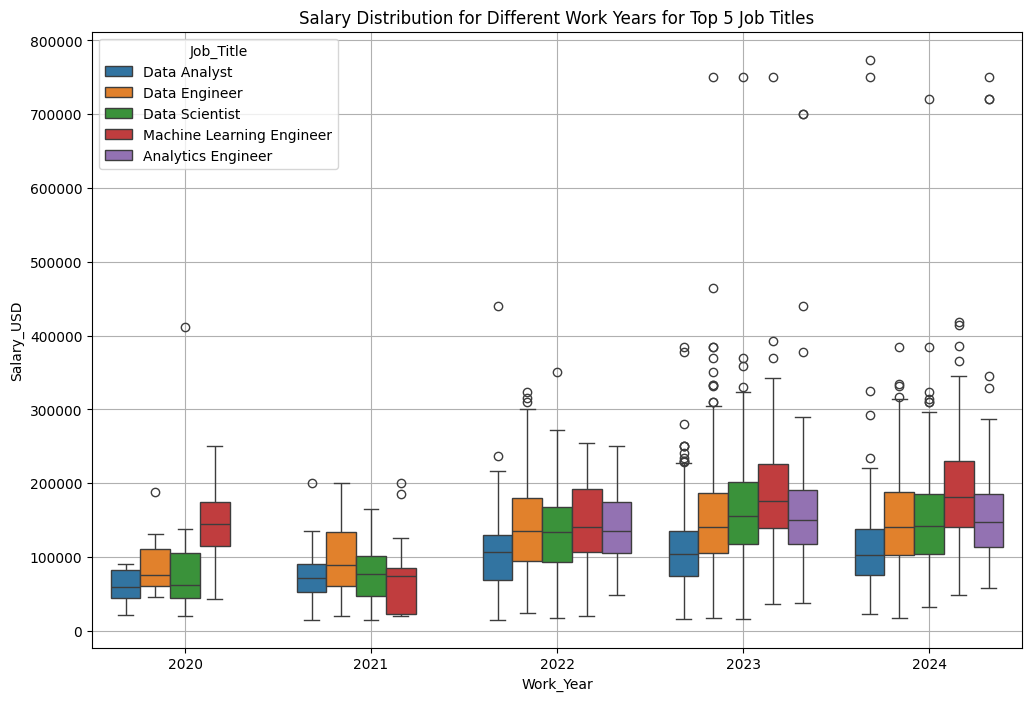

In [142]:
work_experience_salary = salaries_df.groupby(['Work_Year', 'Job_Title'])['Salary_USD']
work_experience_salary = work_experience_salary.apply(lambda x: x).reset_index()
work_experience_salary = work_experience_salary[work_experience_salary['Job_Title'].isin(job_title_freq.head(5).index)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='Work_Year', y='Salary_USD', data=work_experience_salary, hue='Job_Title')
plt.title('Salary Distribution for Different Work Years for Top 5 Job Titles')
plt.grid(True)
plt.show()